### #  [ '240,010,102' : 생수 ] 를 이용하여 lambda fitting_ver(2)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import seaborn as sns

In [3]:
import os
os.getcwd()

'/Users/we/Downloads/업무/buy it again_분석 /임계치 조사'

./chunk/

---

## # 즉석식품 데이터 사용 : '240,010,102'

In [21]:
water_train = pd.read_excel('../water_train.xlsx')
water_test = pd.read_excel('../water_test.xlsx')

In [18]:
water_train.head(3)

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
76,76,2018-01-01 00:00:18,"2,363,189","8,900","1,286,468","240,040,102",1
114,114,2018-01-01 00:00:29,"5,093,799","8,900","1,700,020","240,040,102",1
225,225,2018-01-01 00:00:54,"23,526,491","35,000","1,524,740","240,040,102",1


In [5]:
water_train.tail(3)

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
5994584,75994584,2018-06-13 12:22:41,"6,513,381","12,500","3,735,793","240,040,102",1
5994753,75994753,2018-06-13 12:23:13,"6,573,181","11,900","2,178,079","240,040,102",1
5994809,75994809,2018-06-13 12:23:23,"25,029,604","18,500","100,000,109","240,040,102",2


In [38]:
water_train.m_id.nunique()   # 약 52만명()

485820

In [6]:
train_mid = water_train.m_id.unique()

In [7]:
train_mid

array(['2,363,189', '5,093,799', '23,526,491', ..., '3,220,874',
       '7,374,258', '25,029,604'], dtype=object)

In [54]:
# train_mid[0] 의 구매내역

water_train[water_train.m_id == train_mid[6]]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
342,342,2018-01-01 00:01:18,"23,644,729","11,900","2,178,079","240,040,102",1
3486380,23486380,2018-02-23 11:37:49,"23,644,729","6,600","3,227,680","240,040,102",1
6754641,26754641,2018-03-02 21:50:15,"23,644,729","12,200","2,178,079","240,040,102",1
6245616,36245616,2018-03-22 19:06:55,"23,644,729","6,400","3,227,680","240,040,102",1
1414315,41414315,2018-04-03 12:22:56,"23,644,729","6,400","3,227,680","240,040,102",1
9895767,49895767,2018-04-19 14:00:56,"23,644,729","6,400","3,227,680","240,040,102",1
5462732,55462732,2018-05-01 18:32:41,"23,644,729","6,400","3,227,680","240,040,102",1
1868857,61868857,2018-05-14 20:02:04,"23,644,729","6,400","3,227,680","240,040,102",1
5384327,65384327,2018-05-22 17:04:15,"23,644,729","6,400","3,227,680","240,040,102",1
5210115,75210115,2018-06-11 15:54:42,"23,644,729","11,900","2,178,079","240,040,102",1


In [ ]:
train_mid == water_train.m_id.unique()

In [102]:
water_train.m_id.unique()

array(['2,363,189', '5,093,799', '23,526,491', ..., '3,220,874',
       '7,374,258', '25,029,604'], dtype=object)

In [79]:
%%time


xx = [water_train[water_train.m_id == x].biz_dt.dt.date.nunique() for x in train_mid]

CPU times: user 15h 35min 1s, sys: 1min 9s, total: 15h 36min 11s
Wall time: 21h 19min 10s


In [80]:
len(xx)

485820

In [81]:
xx_ = pd.DataFrame(xx)

In [82]:
xx_.head()

,0
0,1
1,3
2,1
3,1
4,1


In [83]:
xx_.to_excel('water_lambda.xlsx')

---

###  # 만약, 데이터 불러와서 사용한다면

In [4]:
xx_ = pd.read_excel('water_lambda.xlsx')

In [6]:
xx_.head()

,0
0,1
1,3
2,1
3,1
4,1


---

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1115d8320>]],
      dtype=object)

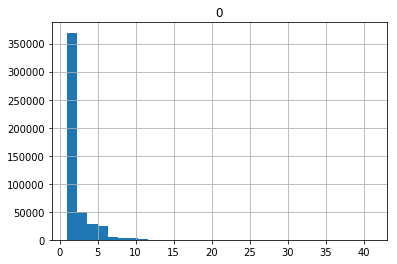

In [7]:
xx_.hist(bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a170b5da0>]],
      dtype=object)

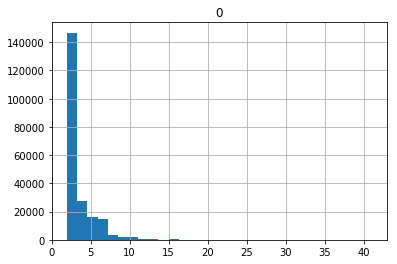

In [8]:
xx_[xx_!=1].hist(bins=30)

In [9]:
import scipy.stats as stats

In [10]:
alpha_, _,scale_ = stats.gamma.fit(xx_, floc=0) 

In [11]:
alpha_, scale_

(2.3461147224707775, 0.865415973214122)

In [12]:
alpha_*scale_

2.0303651558190277

In [13]:
stats.gamma.fit(xx_/32, floc=0) 

(2.346114722470781, 0, 0.02704424916294127)

In [15]:
2.346114722470781*0.02704424916294127

0.06344891111934461

In [14]:
1/(2.346114722470781*0.02704424916294127)

15.76071176570775

In [ ]:
filter = pd.to_datetime(2018-08'')

In [ ]:
water_train[water_train.biz_dt]

In [20]:
water_train.head()

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
76,76,2018-01-01 00:00:18,"2,363,189","8,900","1,286,468","240,040,102",1
114,114,2018-01-01 00:00:29,"5,093,799","8,900","1,700,020","240,040,102",1
225,225,2018-01-01 00:00:54,"23,526,491","35,000","1,524,740","240,040,102",1
256,256,2018-01-01 00:01:01,"1,721,092","10,900","1,272,131","240,040,102",1
278,278,2018-01-01 00:01:08,"7,469,033","11,900","2,178,079","240,040,102",1


In [19]:
water_train.tail()

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
5994376,75994376,2018-06-13 12:22:06,"21,068,197","12,500","2,005,838","240,040,102",1
5994583,75994583,2018-06-13 12:22:41,"2,089,861","13,800","2,937,947","240,040,102",1
5994584,75994584,2018-06-13 12:22:41,"6,513,381","12,500","3,735,793","240,040,102",1
5994753,75994753,2018-06-13 12:23:13,"6,573,181","11,900","2,178,079","240,040,102",1
5994809,75994809,2018-06-13 12:23:23,"25,029,604","18,500","100,000,109","240,040,102",2


In [22]:
water_train.shape[0]+water_test.shape[0]

1431967

In [52]:
len(x)

2000

In [53]:
x_ = pd.DataFrame({'time':x})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a144a2470>]],
      dtype=object)

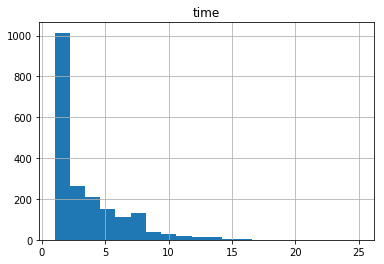

In [54]:
x_.hist(bins=20)

In [63]:
y = x_[x_.time != 1]

In [64]:
y.shape

(1398, 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112e3bdd8>]],
      dtype=object)

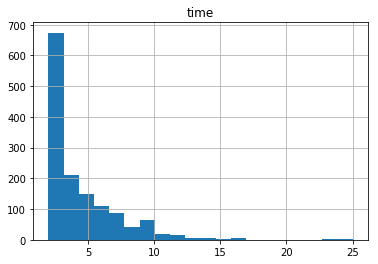

In [66]:
y.hist(bins=20)

In [61]:
x__ = x_/31

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a14cfdf28>]],
      dtype=object)

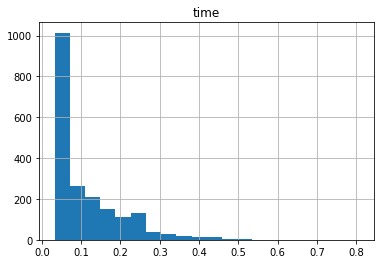

In [56]:
x__.hist(bins = 20)

In [67]:
x__.shape

(2000, 1)

In [69]:
1/31

0.03225806451612903

In [68]:
x__.sort_values(by=['time'])

,time
0,0.032258
901,0.032258
902,0.032258
910,0.032258
912,0.032258
913,0.032258
918,0.032258
924,0.032258
927,0.032258
929,0.032258


In [57]:
import scipy.stats as stats

In [58]:
alpha, _,scale = stats.gamma.fit(x__, floc=0) 

In [59]:
alpha*scale

0.10949999999999997

In [ ]:
stats

In [20]:
len(train_mid)/500

971.64

In [18]:
%%time

rate = []

for i in range(len(train_mid[:500])):
    rate.append(water_train[water_train.m_id == train_mid[i]].biz_dt.dt.date.nunique())

CPU times: user 12.8 s, sys: 15.6 ms, total: 12.8 s
Wall time: 12.8 s


In [13]:
x

[1, 3, 1, 1, 1, 7, 10, 4, 9, 6]

In [ ]:
water_train[water_train.m_id == x].biz_dt.dt.date.nunique()

---

### #  time interval 불러오기

In [3]:
tt = pd.read_csv('../water_train_time_interval.csv', header=None)

In [4]:
tt.head()

,0,1,2,3,4,5,6
0,74,2018-03-29T08:43:54.000+09:00,"1,011,353","16,900","3,472,230","240,040,102",1
1,21,2018-03-05T15:42:15.000+09:00,"1,014,675","29,700","2,818,035","240,040,102",1
2,29,2018-01-30T09:13:07.000+09:00,"1,020,486","8,400","2,178,079","240,040,102",1
3,25,2018-02-24T12:43:41.000+09:00,"1,020,486","10,900","2,128,776","240,040,102",1
4,50,2018-04-15T19:59:44.000+09:00,"1,020,486","5,900","3,549,957","240,040,102",1


In [5]:
tt.columns = ['time','biz_dt', 'm_id', 'order_price', 'prod_no', 'old_admin_category_id', 'serv_cd']

In [6]:
tt = tt.iloc[:,:1]

In [7]:
tt.head()

,time
0,74
1,21
2,29
3,25
4,50


---

# # t (interval) 분석해보자

In [8]:
tt.shape

(500572, 1)

In [9]:
tt = tt.dropna()  # t값 순수하게 얻은거야 - 중원대리님이 뽑아준거에서는 아마 없을거야!

In [10]:
# nan값 제거하고 얻은 shape : 13만 6천개 (전체 - distinct user의 수 (1개 제품 구매자 포함) )

tt.shape

(500572, 1)

In [11]:
tt.head()

,time
0,74
1,21
2,29
3,25
4,50


In [12]:
#음 중원대리님이 뽑아주신 데이터에서는 0이 없어!

tt.time.value_counts()

21     12099
28     11429
20     11288
14     11145
22     10896
15     10561
19     10397
27     10307
18     10231
23     10011
17      9995
16      9971
24      9965
29      9871
26      9772
13      9670
25      9603
30      9232
31      9018
1       8692
35      8457
12      8410
32      8400
34      8357
33      8145
11      7656
36      7546
10      7248
9       6792
42      6713
       ...  
134      159
136      156
139      152
135      148
137      146
138      129
140      128
141      122
143      119
142      112
147      106
144       95
146       94
148       91
145       89
149       84
150       76
151       75
153       69
154       53
152       48
155       38
156       35
158       33
157       26
159       21
160       20
161       15
162        9
163        1
Name: time, Length: 163, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b9a3f60>]],
      dtype=object)

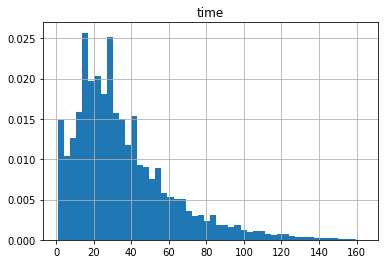

In [13]:
tt.hist(bins=50, density = True)

---

### # test id 데이터에서 뽑아오자

In [14]:
# Test_id : 테스트 데이터에서, unique한 id 1000개

test_id = water_test.m_id.unique()[:1000]

NameError: name 'water_test' is not defined

In [ ]:
len(test_id)

---

In [22]:
# test_id 1000개중에서, train기록 가지고있는 애들만 활용해본다!

tf = []
for i in range(len(test_id)):
    tf.append( bool(water_train[water_train.m_id == test_id[i]].shape[0]) 
              & bool(water_test[water_test.m_id == test_id[i]].shape[0]) == True) #train, test 둘다 있는 아이디를 밝혀주는 index만들어주는거야.

In [23]:
tf

[True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 Tr

In [24]:
len(test_id)

1000

In [25]:
len(test_id[tf]) # train data를 가지고있는 애들(67% 정도네!)

646

In [26]:
test_id_ = test_id[tf]

In [27]:
test_id_

array(['12,962,854', '17,508,303', '12,545,711', '21,195,556',
       '8,252,427', '22,520,016', '11,807,700', '4,065,638', '6,048,174',
       '23,366,868', '9,332,963', '4,067,717', '3,026,773', '13,720,984',
       '2,257,238', '23,765,265', '5,333,237', '7,193,233', '4,324,217',
       '1,678,859', '8,586,314', '7,007,071', '22,024,500', '14,262,829',
       '12,085,012', '2,065,460', '14,228,258', '21,404,415',
       '19,483,337', '4,052,848', '17,440,594', '3,025,816', '7,527,116',
       '10,112,410', '5,589,138', '3,527,814', '1,909,792', '2,550,649',
       '5,009,251', '16,707,713', '20,568,914', '3,945,596', '8,047,878',
       '18,283,227', '8,455,855', '8,729,799', '3,751,793', '9,880,252',
       '12,594,133', '21,672,568', '20,193,199', '2,143,590', '9,397,251',
       '14,304,955', '23,909,062', '16,605,140', '24,437,859',
       '1,081,366', '21,394,839', '10,446,704', '5,738,434', '19,798,814',
       '12,917,221', '1,524,663', '18,591,284', '16,244,881',
       '10,

---

# ----------------------------------------------------------------------------------------

---

## * lambda라는 개념을 다시 잡기.
poisson(lambda) : 이때의 lambda는 단위시간 당 사건의 평균적인 발생 횟수. - 이를 추정하기 위해, 단위 시간 당 사건의 발생횟수의 분포를 본다.


## # 1/time 을 감마 피팅 하자.
: time들의 분포를 알고있다 -> 단위 시간 당, 사건의 발생횟수를 맞춰줄 수 있다. 예를 들어, user들로부터 t=(3일,4일,5일,6일)이라는 time-interval을 얻게 되었다고 하자.

 이때, 단위 시간 당 사건의 발생 횟수 X=(1/3, 1/4, 1/5, 1/6)이고, 이 분포를 이용해 poisson(lambda)를 추정하는 것이다.

In [15]:
tt.mean()   # 평균 39일?

time    35.347516
dtype: float64

In [16]:
# tt의 inverse를 사용할 것이다.

tt_inver = 1/tt

In [17]:
tt_inver.head()

,time
0,0.013514
1,0.047619
2,0.034483
3,0.040000
4,0.020000


In [18]:
1/tt_inver.mean()

time    14.315988
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a14b23d68>]],
      dtype=object)

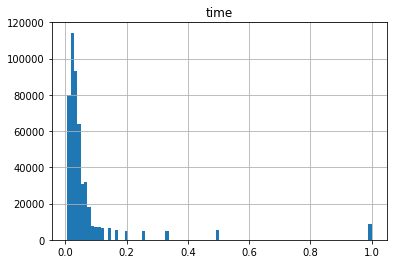

In [19]:
tt_inver.hist(bins=90)

In [20]:
# unit time - 일주일

tt_inver7 = tt_inver*7

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17dfcbe0>]],
      dtype=object)

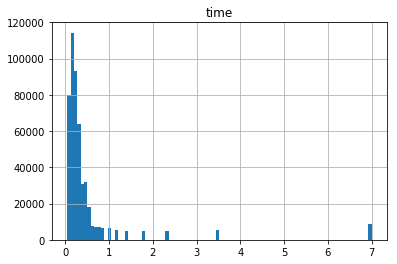

In [21]:
tt_inver7.hist(bins=90)

In [22]:
tt_inver7.mean()

time    0.488964
dtype: float64

In [23]:
1/tt_inver7.mean()

time    2.045141
dtype: float64

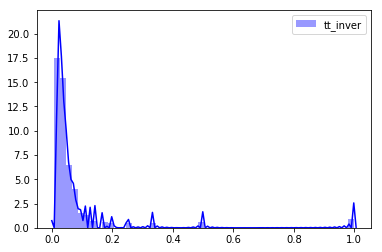

In [24]:
# tt_inver 의 분포를 살펴보는거야

plt.figure()
sns.distplot( tt_inver, color = 'blue', label='tt_inver')
plt.legend()
#plt.xlim(-3,55)

plt.show()
plt.close()

---

### # (1) gamma.fit으로 parameters 추정해볼게.

In [25]:
alpha, _ , scale = stats.gamma.fit(tt_inver, floc=0) 

In [26]:
alpha, scale

(0.9738897567578911, 0.07172472032793752)

In [27]:
1/scale    #Beta

13.942194482290505

---

### # 1주일 단위로

In [28]:
# 1주윌 단위로 계산 -> 하루 단위에서 7배 해주면 되지.

tt_inver7 = tt_inver*7

In [29]:
tt_inver7.time.value_counts()

0.333333    12099
0.250000    11429
0.350000    11288
0.500000    11145
0.318182    10896
0.466667    10561
0.368421    10397
0.259259    10307
0.388889    10231
0.304348    10011
0.411765     9995
0.437500     9971
0.291667     9965
0.241379     9871
0.269231     9772
0.538462     9670
0.280000     9603
0.233333     9232
0.225806     9018
7.000000     8692
0.200000     8457
0.583333     8410
0.218750     8400
0.205882     8357
0.212121     8145
0.636364     7656
0.194444     7546
0.700000     7248
0.777778     6792
0.166667     6713
            ...  
0.052239      159
0.051471      156
0.050360      152
0.051852      148
0.051095      146
0.050725      129
0.050000      128
0.049645      122
0.048951      119
0.049296      112
0.047619      106
0.048611       95
0.047945       94
0.047297       91
0.048276       89
0.046980       84
0.046667       76
0.046358       75
0.045752       69
0.045455       53
0.046053       48
0.045161       38
0.044872       35
0.044304       33
0.044586  

In [30]:
print(tt_inver.shape[0], sum(tt_inver7.time == 7.0)  )  # 40만개중에, 약 14,561 개가 time-interval=1이야

# tt_invr7 == 7 이라는 의미는, 1주일 단위에 구매가 '7번'일어나는 사람들의 frequency를 보여주는거야!(사실은, 하루에 한번 산 사람들!) 

500572 8692


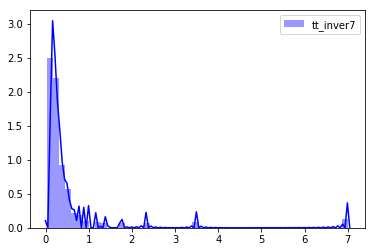

In [31]:
plt.figure()
sns.distplot( tt_inver7, color = 'blue', label='tt_inver7')
plt.legend()
#plt.xlim(-3,55)

plt.show()
plt.close()

In [32]:
alpha_, _ , scale_ = stats.gamma.fit(tt_inver7, floc=0) 

In [33]:
alpha_, scale_

(0.973889756757891, 0.5020730422955627)

In [34]:
1/0.5020730422955627

1.9917420688986431

In [5]:
1/1.0808708153181152

0.9251799436417257

In [48]:
tt_inver7.mean()

time    0.743863
dtype: float64

In [49]:
alpha_*scale_   # tt_inver7.mean() == alpha_*scale_

0.7438625916820053

In [50]:
import scipy.stats as stats

In [51]:
y = stats.gamma.rvs(a = alpha_, loc=0, scale=scale_, size=1000, random_state=None)

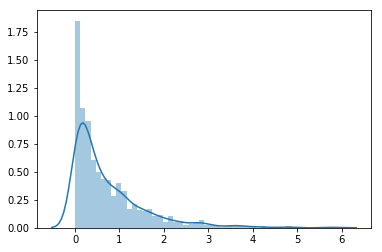

In [52]:
plt.figure()
sns.distplot(y, bins=50)


---

---

## # 일주일

In [53]:
len(test_id_)

646

In [26]:
# 설정한 current에서 한달 정도의 기간을 만들어준다.

current_l = pd.date_range('2018-08-01', periods=30).tolist()

In [27]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(train, test, test_id, current, alpha, beta, tmean):
    t_ = (current.date() - train[train.m_id == test_id].iloc[-1].biz_dt.date()).days/7  # 구매이력이 없는사람은?(고려해야해) - 지금은 있는 사람만.
    t_purch = (train[train.m_id == test_id].iloc[-1].biz_dt.date() - train[train.m_id == test_id].iloc[0].biz_dt.date()).days/7
    k = train.biz_dt.dt.date[train.m_id == test_id].nunique() # train 구매 day-time이력
    if (k <= 1) or (train.biz_dt[train.m_id == test_id].diff().mean().days/7 == 0) :# if구매이력이 1회 이하 or user_mean=0
        tmean_u = tmean # tmean : 모든 user들의 상품에대한 평균 t(구매이력이 한번밖에 없으니, user의 고유 평균 t값 대입할 수 없다.)
    else:
        y = train.biz_dt[train.m_id == test_id].dt.date.diff().dt.days
        y = y.replace(0, np.NaN)
        tmean_u = y.mean()/7
    
    if t_purch == 0:  # t_purch가 0이라는 소리는, k=1이라는 소리겠지! 그러니깐 앞의 값이 0이 되게끔 한거야.
        lamb = (alpha/(2*abs(tmean_u-t_)+beta))
        lamb_0 = (alpha/(2*abs(tmean_u)+beta))   # 최저값 : t=0
        lamb_1 = (alpha/+beta)     # 최고값 : |tmean-t|=0
    else:
        lamb = (k/t_purch+(alpha/(2*abs(tmean_u-t_)+beta)))
        lamb_0 = (k/t_purch+(alpha/(2*abs(tmean_u)+beta)))   # 최저값 : t=0  
        lamb_1 = (k/t_purch+(alpha/+beta))     #최고값 : |tmean-t|=0
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [35]:
test_id_ = ['11,807,700']

In [36]:
len(test_id_)

1

In [39]:
## 출력

c = {}

for j in range(len(test_id_)):   # "test_id_" 를 이용해, 결과 살펴보겠다!
    c[j] = []
    #print('user: {}, start !'.format(j))  #start 표시만 해줄게
    
    for i in range(30):     ## 8월 한달간에 대해서!
        lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(train = water_train, test = water_test, test_id=test_id_[j], 
                  alpha = alpha_ , beta=1/scale_ , tmean = tt.mean().item()/7 , current=current_l[i])
        
        if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
            lamb = lamb_0
        pred = (1-stats.poisson.pmf(mu = lamb, k=0))
        max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
        min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
        scal = (pred - min)/(max - min)
        
        if i == 0:
            print('user:[{}]'.format(j),'last order:', water_train.biz_dt[water_train.m_id == test_id_[j]][-1:], '\n')
            print('min:',min, ', max:',max)
        print('current:',current_l[i], ', current-last_order:', t_ , ', tmean_u:',tmean_u)  
        print('scal_pred:', scal,', pred:',pred, ', t_purch:', t_purch, ', k:',k)
        print(lamb, lamb_0, lamb_1, '\n')
        c[j].append( scal )
    print('------------------------------------------------------------------------')
    print('\n')

user:[0] last order: 8241236   2018-07-30 07:27:11
Name: biz_dt, dtype: datetime64[ns] 

min: 0.568431506230314 , max: 0.7577867314102313
current: 2018-08-01 00:00:00 , current-last_order: 0.2857142857142857 , tmean_u: 1.6071428571428572
scal_pred: 0.0598839891397482 , pred: 0.5797708524785428 , t_purch: 19.285714285714285 , k: 13
0.8669551271476698 0.8403290469427509 1.4179366657560795 

current: 2018-08-02 00:00:00 , current-last_order: 0.42857142857142855 , tmean_u: 1.6071428571428572
scal_pred: 0.0968334749884789 , pred: 0.5867674306917113 , t_purch: 19.285714285714285 , k: 13
0.8837447227028568 0.8403290469427509 1.4179366657560795 

current: 2018-08-03 00:00:00 , current-last_order: 0.5714285714285714 , tmean_u: 1.6071428571428572
scal_pred: 0.14002743536573262 , pred: 0.5949464327853586 , t_purch: 19.285714285714285 , k: 13
0.9037359558942962 0.8403290469427509 1.4179366657560795 

current: 2018-08-04 00:00:00 , current-last_order: 0.7142857142857143 , tmean_u: 1.607142857142857

## # test로 30명정도 출력!

In [84]:
## 출력

c = {}

for j in range(len(test_id_[:30])):   # "test_id_" 를 이용해, 결과 살펴보겠다!
    c[j] = []
    #print('user: {}, start !'.format(j))  #start 표시만 해줄게
    
    for i in range(30):     ## 8월 한달간에 대해서!
        lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(train = water_train, test = water_test, test_id=test_id_[j], 
                  alpha = alpha_ , beta=1/scale_ , tmean = tt.mean().item()/7 , current=current_l[i])
        
        if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
            lamb = lamb_0
        pred = (1-stats.poisson.pmf(mu = lamb, k=0))
        max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
        min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
        scal = (pred - min)/(max - min)
        
        if i == 0:
            print('user:[{}]'.format(j),'last order:', water_train.biz_dt[water_train.m_id == test_id_[j]][-1:], '\n')
            print('min:',min, ', max:',max)
        print('current:',current_l[i], ', current-last_order:', t_ , ', tmean_u:',tmean_u)  
        print('scal_pred:', scal,', pred:',pred, ', t_purch:', t_purch, ', k:',k ,'\n')
        c[j].append( scal )
    print('------------------------------------------------------------------------')
    print('\n')

user:[0] last order: 5483751   2018-07-04 19:52:16
Name: biz_dt, dtype: datetime64[ns] 

min: 0.18528349843496372 , max: 0.5968991394514986
current: 2018-08-01 00:00:00 , current-last_order: 4.0 , tmean_u: 8.095238095238095
scal_pred: 0.06862808915113403 , pred: 0.21353189334264766 , t_purch: 24.285714285714285 , k: 4 

current: 2018-08-02 00:00:00 , current-last_order: 4.142857142857143 , tmean_u: 8.095238095238095
scal_pred: 0.07329000030420396 , pred: 0.21545080889028068 , t_purch: 24.285714285714285 , k: 4 

current: 2018-08-03 00:00:00 , current-last_order: 4.285714285714286 , tmean_u: 8.095238095238095
scal_pred: 0.07825115445188557 , pred: 0.21749289753496048 , t_purch: 24.285714285714285 , k: 4 

current: 2018-08-04 00:00:00 , current-last_order: 4.428571428571429 , tmean_u: 8.095238095238095
scal_pred: 0.08354130048492496 , pred: 0.21967040438542107 , t_purch: 24.285714285714285 , k: 4 

current: 2018-08-05 00:00:00 , current-last_order: 4.571428571428571 , tmean_u: 8.09523809

current: 2018-08-12 00:00:00 , current-last_order: 1.7142857142857142 , tmean_u: 9.761904761904761
scal_pred: 0.013288125542492731 , pred: 0.16223659555655257 , t_purch: 29.285714285714285 , k: 4 

current: 2018-08-13 00:00:00 , current-last_order: 1.8571428571428572 , tmean_u: 9.761904761904761
scal_pred: 0.01463619865536263 , pred: 0.16281473702533955 , t_purch: 29.285714285714285 , k: 4 

current: 2018-08-14 00:00:00 , current-last_order: 2.0 , tmean_u: 9.761904761904761
scal_pred: 0.01603012372633537 , pred: 0.16341254279730955 , t_purch: 29.285714285714285 , k: 4 

current: 2018-08-15 00:00:00 , current-last_order: 2.142857142857143 , tmean_u: 9.761904761904761
scal_pred: 0.01747228019443043 , pred: 0.1640310333307422 , t_purch: 29.285714285714285 , k: 4 

current: 2018-08-16 00:00:00 , current-last_order: 2.2857142857142856 , tmean_u: 9.761904761904761
scal_pred: 0.018965215006754653 , pred: 0.16467130092228466 , t_purch: 29.285714285714285 , k: 4 

current: 2018-08-17 00:00:00 ,

current: 2018-08-27 00:00:00 , current-last_order: 14.0 , tmean_u: 5.669913557225202
scal_pred: 0.0 , pred: 0.03837933540061622 , t_purch: 0.0 , k: 1 

current: 2018-08-28 00:00:00 , current-last_order: 14.142857142857142 , tmean_u: 5.669913557225202
scal_pred: 0.0 , pred: 0.037777484423269 , t_purch: 0.0 , k: 1 

current: 2018-08-29 00:00:00 , current-last_order: 14.285714285714286 , tmean_u: 5.669913557225202
scal_pred: 0.0 , pred: 0.037194215761847005 , t_purch: 0.0 , k: 1 

current: 2018-08-30 00:00:00 , current-last_order: 14.428571428571429 , tmean_u: 5.669913557225202
scal_pred: 0.0 , pred: 0.036628682001089596 , t_purch: 0.0 , k: 1 

------------------------------------------------------------------------


user:[3] last order: 9801471   2018-06-01 10:05:17
Name: biz_dt, dtype: datetime64[ns] 

min: 0.05456619389330497 , max: 0.5247254261207082
current: 2018-08-01 00:00:00 , current-last_order: 8.714285714285714 , tmean_u: 5.669913557225202
scal_pred: 0.08272465150567504 , pred

current: 2018-08-11 00:00:00 , current-last_order: 5.857142857142857 , tmean_u: 12.928571428571429
scal_pred: 0.03860367571228871 , pred: 0.14929969829197398 , t_purch: 25.857142857142858 , k: 3 

current: 2018-08-12 00:00:00 , current-last_order: 6.0 , tmean_u: 12.928571428571429
scal_pred: 0.0402918353567724 , pred: 0.15005034646154736 , t_purch: 25.857142857142858 , k: 3 

current: 2018-08-13 00:00:00 , current-last_order: 6.142857142857143 , tmean_u: 12.928571428571429
scal_pred: 0.0420449601963493 , pred: 0.15082988171235268 , t_purch: 25.857142857142858 , k: 3 

current: 2018-08-14 00:00:00 , current-last_order: 6.285714285714286 , tmean_u: 12.928571428571429
scal_pred: 0.04386687308953404 , pred: 0.15164000389650756 , t_purch: 25.857142857142858 , k: 3 

current: 2018-08-15 00:00:00 , current-last_order: 6.428571428571429 , tmean_u: 12.928571428571429
scal_pred: 0.045761702769042935 , pred: 0.15248254887453994 , t_purch: 25.857142857142858 , k: 3 

current: 2018-08-16 00:00:00 ,

current: 2018-08-22 00:00:00 , current-last_order: 3.4285714285714284 , tmean_u: 5.607142857142857
scal_pred: 0.142756575993767 , pred: 0.2975737099224105 , t_purch: 22.428571428571427 , k: 5 

current: 2018-08-23 00:00:00 , current-last_order: 3.5714285714285716 , tmean_u: 5.607142857142857
scal_pred: 0.15663096440531668 , pred: 0.3027872733221144 , t_purch: 22.428571428571427 , k: 5 

current: 2018-08-24 00:00:00 , current-last_order: 3.7142857142857144 , tmean_u: 5.607142857142857
scal_pred: 0.17206587114181868 , pred: 0.3085872309456362 , t_purch: 22.428571428571427 , k: 5 

current: 2018-08-25 00:00:00 , current-last_order: 3.857142857142857 , tmean_u: 5.607142857142857
scal_pred: 0.18933961983593353 , pred: 0.31507816815281087 , t_purch: 22.428571428571427 , k: 5 

current: 2018-08-26 00:00:00 , current-last_order: 4.0 , tmean_u: 5.607142857142857
scal_pred: 0.2088007032658768 , pred: 0.3223910376847374 , t_purch: 22.428571428571427 , k: 5 

current: 2018-08-27 00:00:00 , current

current: 2018-08-03 00:00:00 , current-last_order: 21.0 , tmean_u: 5.669913557225202
scal_pred: 0.0 , pred: 0.021553133058960006 , t_purch: 0.0 , k: 1 

current: 2018-08-04 00:00:00 , current-last_order: 21.142857142857142 , tmean_u: 5.669913557225202
scal_pred: 0.0 , pred: 0.021361994543126817 , t_purch: 0.0 , k: 1 

current: 2018-08-05 00:00:00 , current-last_order: 21.285714285714285 , tmean_u: 5.669913557225202
scal_pred: 0.0 , pred: 0.021174216224687847 , t_purch: 0.0 , k: 1 

current: 2018-08-06 00:00:00 , current-last_order: 21.428571428571427 , tmean_u: 5.669913557225202
scal_pred: 0.0 , pred: 0.020989710271144935 , t_purch: 0.0 , k: 1 

current: 2018-08-07 00:00:00 , current-last_order: 21.571428571428573 , tmean_u: 5.669913557225202
scal_pred: 0.0 , pred: 0.020808391884591382 , t_purch: 0.0 , k: 1 

current: 2018-08-08 00:00:00 , current-last_order: 21.714285714285715 , tmean_u: 5.669913557225202
scal_pred: 0.0 , pred: 0.02063017917178378 , t_purch: 0.0 , k: 1 

current: 2018

current: 2018-08-20 00:00:00 , current-last_order: 11.857142857142858 , tmean_u: 2.5892857142857144
scal_pred: 0.0 , pred: 0.37490168115310685 , t_purch: 20.714285714285715 , k: 9 

current: 2018-08-21 00:00:00 , current-last_order: 12.0 , tmean_u: 2.5892857142857144
scal_pred: 0.0 , pred: 0.37458175111308034 , t_purch: 20.714285714285715 , k: 9 

current: 2018-08-22 00:00:00 , current-last_order: 12.142857142857142 , tmean_u: 2.5892857142857144
scal_pred: 0.0 , pred: 0.37427079038002165 , t_purch: 20.714285714285715 , k: 9 

current: 2018-08-23 00:00:00 , current-last_order: 12.285714285714286 , tmean_u: 2.5892857142857144
scal_pred: 0.0 , pred: 0.3739684270202679 , t_purch: 20.714285714285715 , k: 9 

current: 2018-08-24 00:00:00 , current-last_order: 12.428571428571429 , tmean_u: 2.5892857142857144
scal_pred: 0.0 , pred: 0.37367430938194857 , t_purch: 20.714285714285715 , k: 9 

current: 2018-08-25 00:00:00 , current-last_order: 12.571428571428571 , tmean_u: 2.5892857142857144
scal_

current: 2018-08-04 00:00:00 , current-last_order: 4.571428571428571 , tmean_u: 5.669913557225202
scal_pred: 0.3047005307097147 , pred: 0.19782396147106673 , t_purch: 0.0 , k: 1 

current: 2018-08-05 00:00:00 , current-last_order: 4.714285714285714 , tmean_u: 5.669913557225202
scal_pred: 0.3421664486626336 , pred: 0.21543890869050597 , t_purch: 0.0 , k: 1 

current: 2018-08-06 00:00:00 , current-last_order: 4.857142857142857 , tmean_u: 5.669913557225202
scal_pred: 0.3869077391618656 , pred: 0.23647443948048807 , t_purch: 0.0 , k: 1 

current: 2018-08-07 00:00:00 , current-last_order: 5.0 , tmean_u: 5.669913557225202
scal_pred: 0.4412487109996579 , pred: 0.26202334907823543 , t_purch: 0.0 , k: 1 

current: 2018-08-08 00:00:00 , current-last_order: 5.142857142857143 , tmean_u: 5.669913557225202
scal_pred: 0.5086052265441157 , pred: 0.29369163671213083 , t_purch: 0.0 , k: 1 

current: 2018-08-09 00:00:00 , current-last_order: 5.285714285714286 , tmean_u: 5.669913557225202
scal_pred: 0.594

current: 2018-08-18 00:00:00 , current-last_order: 8.857142857142858 , tmean_u: 6.428571428571429
scal_pred: 0.1334012202355236 , pred: 0.29696768094214465 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-19 00:00:00 , current-last_order: 9.0 , tmean_u: 6.428571428571429
scal_pred: 0.12292015471119785 , pred: 0.2930168078217379 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-20 00:00:00 , current-last_order: 9.142857142857142 , tmean_u: 6.428571428571429
scal_pred: 0.11333052560159138 , pred: 0.2894019646747429 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-21 00:00:00 , current-last_order: 9.285714285714286 , tmean_u: 6.428571428571429
scal_pred: 0.10452335456883369 , pred: 0.2860820717478846 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-22 00:00:00 , current-last_order: 9.428571428571429 , tmean_u: 6.428571428571429
scal_pred: 0.09640671443148913 , pred: 0.28302247677901216 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-23 00:00:00 , current

current: 2018-08-30 00:00:00 , current-last_order: 8.571428571428571 , tmean_u: 8.619047619047619
scal_pred: 0.9299160099282181 , pred: 0.5635721550236725 , t_purch: 25.857142857142858 , k: 4 

------------------------------------------------------------------------


user:[13] last order: 9104606   2018-07-31 23:50:46
Name: biz_dt, dtype: datetime64[ns] 

min: 0.05456619389330497 , max: 0.5247254261207082
current: 2018-08-01 00:00:00 , current-last_order: 0.14285714285714285 , tmean_u: 5.669913557225202
scal_pred: 0.0026893509927234343 , pred: 0.055830617091233825 , t_purch: 0.0 , k: 1 

current: 2018-08-02 00:00:00 , current-last_order: 0.2857142857142857 , tmean_u: 5.669913557225202
scal_pred: 0.00550625755856004 , pred: 0.057155011719483895 , t_purch: 0.0 , k: 1 

current: 2018-08-03 00:00:00 , current-last_order: 0.42857142857142855 , tmean_u: 5.669913557225202
scal_pred: 0.008460012068874099 , pred: 0.05854374667224138 , t_purch: 0.0 , k: 1 

current: 2018-08-04 00:00:00 , curren

current: 2018-08-15 00:00:00 , current-last_order: 29.142857142857142 , tmean_u: 5.669913557225202
scal_pred: 0.0 , pred: 0.014273411780125977 , t_purch: 0.0 , k: 1 

current: 2018-08-16 00:00:00 , current-last_order: 29.285714285714285 , tmean_u: 5.669913557225202
scal_pred: 0.0 , pred: 0.014189331274412353 , t_purch: 0.0 , k: 1 

current: 2018-08-17 00:00:00 , current-last_order: 29.428571428571427 , tmean_u: 5.669913557225202
scal_pred: 0.0 , pred: 0.014106235538397183 , t_purch: 0.0 , k: 1 

current: 2018-08-18 00:00:00 , current-last_order: 29.571428571428573 , tmean_u: 5.669913557225202
scal_pred: 0.0 , pred: 0.014024107372331174 , t_purch: 0.0 , k: 1 

current: 2018-08-19 00:00:00 , current-last_order: 29.714285714285715 , tmean_u: 5.669913557225202
scal_pred: 0.0 , pred: 0.013942929974682272 , t_purch: 0.0 , k: 1 

current: 2018-08-20 00:00:00 , current-last_order: 29.857142857142858 , tmean_u: 5.669913557225202
scal_pred: 0.0 , pred: 0.013862686930677381 , t_purch: 0.0 , k: 1 

user:[16] last order: 3719222   2018-07-01 19:38:20
Name: biz_dt, dtype: datetime64[ns] 

min: 0.2665184359222281 , max: 0.6282287847849417
current: 2018-08-01 00:00:00 , current-last_order: 4.428571428571429 , tmean_u: 4.885714285714286
scal_pred: 0.5402156669241246 , pred: 0.4619200332664567 , t_purch: 24.428571428571427 , k: 6 

current: 2018-08-02 00:00:00 , current-last_order: 4.571428571428571 , tmean_u: 4.885714285714286
scal_pred: 0.6391187546051322 , pred: 0.49769430361515354 , t_purch: 24.428571428571427 , k: 6 

current: 2018-08-03 00:00:00 , current-last_order: 4.714285714285714 , tmean_u: 4.885714285714286
scal_pred: 0.7710212945677366 , pred: 0.5454048173609052 , t_purch: 24.428571428571427 , k: 6 

current: 2018-08-04 00:00:00 , current-last_order: 4.857142857142857 , tmean_u: 4.885714285714286
scal_pred: 0.9545487943138649 , pred: 0.6117886133199788 , t_purch: 24.428571428571427 , k: 6 

current: 2018-08-05 00:00:00 , current-last_order: 5.0 , tmean_u: 4.885714285714286

current: 2018-08-12 00:00:00 , current-last_order: 2.142857142857143 , tmean_u: 9.904761904761903
scal_pred: 0.016926958932194917 , pred: 0.16176285681073566 , t_purch: 29.714285714285715 , k: 4 

current: 2018-08-13 00:00:00 , current-last_order: 2.2857142857142856 , tmean_u: 9.904761904761903
scal_pred: 0.01836780095284178 , pred: 0.16238256695983078 , t_purch: 29.714285714285715 , k: 4 

current: 2018-08-14 00:00:00 , current-last_order: 2.4285714285714284 , tmean_u: 9.904761904761903
scal_pred: 0.01985937503600959 , pred: 0.16302409710971588 , t_purch: 29.714285714285715 , k: 4 

current: 2018-08-15 00:00:00 , current-last_order: 2.5714285714285716 , tmean_u: 9.904761904761903
scal_pred: 0.021404408150883316 , pred: 0.16368862013740038 , t_purch: 29.714285714285715 , k: 4 

current: 2018-08-16 00:00:00 , current-last_order: 2.7142857142857144 , tmean_u: 9.904761904761903
scal_pred: 0.02300582623803488 , pred: 0.164377394498039 , t_purch: 29.714285714285715 , k: 4 

current: 2018-08

current: 2018-08-27 00:00:00 , current-last_order: 13.857142857142858 , tmean_u: 5.669913557225202
scal_pred: 0.0 , pred: 0.03900067096396409 , t_purch: 0.0 , k: 1 

current: 2018-08-28 00:00:00 , current-last_order: 14.0 , tmean_u: 5.669913557225202
scal_pred: 0.0 , pred: 0.03837933540061622 , t_purch: 0.0 , k: 1 

current: 2018-08-29 00:00:00 , current-last_order: 14.142857142857142 , tmean_u: 5.669913557225202
scal_pred: 0.0 , pred: 0.037777484423269 , t_purch: 0.0 , k: 1 

current: 2018-08-30 00:00:00 , current-last_order: 14.285714285714286 , tmean_u: 5.669913557225202
scal_pred: 0.0 , pred: 0.037194215761847005 , t_purch: 0.0 , k: 1 

------------------------------------------------------------------------


user:[19] last order: 3360744   2018-07-01 00:09:40
Name: biz_dt, dtype: datetime64[ns] 

min: 0.4167476586258013 , max: 0.7019605022124933
current: 2018-08-01 00:00:00 , current-last_order: 4.428571428571429 , tmean_u: 4.285714285714286
scal_pred: 0.7995096423991084 , pred: 

current: 2018-08-09 00:00:00 , current-last_order: 1.2857142857142858 , tmean_u: 5.669913557225202
scal_pred: 0.029709780708670912 , pred: 0.0685345215809382 , t_purch: 0.0 , k: 1 

current: 2018-08-10 00:00:00 , current-last_order: 1.4285714285714286 , tmean_u: 5.669913557225202
scal_pred: 0.033976847040411796 , pred: 0.0705407222113329 , t_purch: 0.0 , k: 1 

current: 2018-08-11 00:00:00 , current-last_order: 1.5714285714285714 , tmean_u: 5.669913557225202
scal_pred: 0.038501138812361134 , pred: 0.07266785975720536 , t_purch: 0.0 , k: 1 

current: 2018-08-12 00:00:00 , current-last_order: 1.7142857142857142 , tmean_u: 5.669913557225202
scal_pred: 0.043306624751745786 , pred: 0.07492720333694602 , t_purch: 0.0 , k: 1 

current: 2018-08-13 00:00:00 , current-last_order: 1.8571428571428572 , tmean_u: 5.669913557225202
scal_pred: 0.048420345123267115 , pred: 0.07733146618064612 , t_purch: 0.0 , k: 1 

current: 2018-08-14 00:00:00 , current-last_order: 2.0 , tmean_u: 5.669913557225202
sca

current: 2018-08-22 00:00:00 , current-last_order: 10.0 , tmean_u: 6.428571428571429
scal_pred: 0.06944234917058116 , pred: 0.27285816803856044 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-23 00:00:00 , current-last_order: 10.142857142857142 , tmean_u: 6.428571428571429
scal_pred: 0.06380640602671545 , pred: 0.270733680196789 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-24 00:00:00 , current-last_order: 10.285714285714286 , tmean_u: 6.428571428571429
scal_pred: 0.05852836560605414 , pred: 0.2687441049977777 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-25 00:00:00 , current-last_order: 10.428571428571429 , tmean_u: 6.428571428571429
scal_pred: 0.05357520276980044 , pred: 0.2668769935036902 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-26 00:00:00 , current-last_order: 10.571428571428571 , tmean_u: 6.428571428571429
scal_pred: 0.048917832198924295 , pred: 0.26512138190508494 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-27 00:00:00 , c

current: 2018-08-03 00:00:00 , current-last_order: 5.142857142857143 , tmean_u: 5.669913557225202
scal_pred: 0.5086052265441157 , pred: 0.29369163671213083 , t_purch: 0.0 , k: 1 

current: 2018-08-04 00:00:00 , current-last_order: 5.285714285714286 , tmean_u: 5.669913557225202
scal_pred: 0.5941925598586634 , pred: 0.33393131163168943 , t_purch: 0.0 , k: 1 

current: 2018-08-05 00:00:00 , current-last_order: 5.428571428571429 , tmean_u: 5.669913557225202
scal_pred: 0.7063360914994957 , pred: 0.3866566283672127 , t_purch: 0.0 , k: 1 

current: 2018-08-06 00:00:00 , current-last_order: 5.571428571428571 , tmean_u: 5.669913557225202
scal_pred: 0.8590053140234447 , pred: 0.4584354728138271 , t_purch: 0.0 , k: 1 

current: 2018-08-07 00:00:00 , current-last_order: 5.714285714285714 , tmean_u: 5.669913557225202
scal_pred: 0.9319948401623782 , pred: 0.4927521723839501 , t_purch: 0.0 , k: 1 

current: 2018-08-08 00:00:00 , current-last_order: 5.857142857142857 , tmean_u: 5.669913557225202
scal_

current: 2018-08-17 00:00:00 , current-last_order: 6.714285714285714 , tmean_u: 4.428571428571429
scal_pred: 0.10891241695529062 , pred: 0.4383175415881271 , t_purch: 4.428571428571429 , k: 2 

current: 2018-08-18 00:00:00 , current-last_order: 6.857142857142857 , tmean_u: 4.428571428571429
scal_pred: 0.09692559280098668 , pred: 0.43483185201873553 , t_purch: 4.428571428571429 , k: 2 

current: 2018-08-19 00:00:00 , current-last_order: 7.0 , tmean_u: 4.428571428571429
scal_pred: 0.0860033733654053 , pred: 0.43165574249455085 , t_purch: 4.428571428571429 , k: 2 

current: 2018-08-20 00:00:00 , current-last_order: 7.142857142857143 , tmean_u: 4.428571428571429
scal_pred: 0.07601011140192825 , pred: 0.42874976768905726 , t_purch: 4.428571428571429 , k: 2 

current: 2018-08-21 00:00:00 , current-last_order: 7.285714285714286 , tmean_u: 4.428571428571429
scal_pred: 0.0668322416134783 , pred: 0.4260809035613269 , t_purch: 4.428571428571429 , k: 2 

current: 2018-08-22 00:00:00 , current-last

current: 2018-08-29 00:00:00 , current-last_order: 8.285714285714286 , tmean_u: 6.357142857142857
scal_pred: 0.17838563645640915 , pred: 0.2886107929866645 , t_purch: 25.428571428571427 , k: 5 

current: 2018-08-30 00:00:00 , current-last_order: 8.428571428571429 , tmean_u: 6.357142857142857
scal_pred: 0.16355129246839928 , pred: 0.2828159409210895 , t_purch: 25.428571428571427 , k: 5 

------------------------------------------------------------------------


user:[26] last order: 931213   2018-06-25 13:00:08
Name: biz_dt, dtype: datetime64[ns] 

min: 0.2522314017757118 , max: 0.6298557896888792
current: 2018-08-01 00:00:00 , current-last_order: 5.285714285714286 , tmean_u: 8.0
scal_pred: 0.12953537140567434 , pred: 0.3011471171158844 , t_purch: 8.0 , k: 2 

current: 2018-08-02 00:00:00 , current-last_order: 5.428571428571429 , tmean_u: 8.0
scal_pred: 0.13894973964803922 , pred: 0.3047022121609966 , t_purch: 8.0 , k: 2 

current: 2018-08-03 00:00:00 , current-last_order: 5.57142857142

current: 2018-08-18 00:00:00 , current-last_order: 24.285714285714285 , tmean_u: 5.669913557225202
scal_pred: 0.0 , pred: 0.017874608997011654 , t_purch: 0.0 , k: 1 

current: 2018-08-19 00:00:00 , current-last_order: 24.428571428571427 , tmean_u: 5.669913557225202
scal_pred: 0.0 , pred: 0.017742946034229656 , t_purch: 0.0 , k: 1 

current: 2018-08-20 00:00:00 , current-last_order: 24.571428571428573 , tmean_u: 5.669913557225202
scal_pred: 0.0 , pred: 0.017613208475603326 , t_purch: 0.0 , k: 1 

current: 2018-08-21 00:00:00 , current-last_order: 24.714285714285715 , tmean_u: 5.669913557225202
scal_pred: 0.0 , pred: 0.01748535439391652 , t_purch: 0.0 , k: 1 

current: 2018-08-22 00:00:00 , current-last_order: 24.857142857142858 , tmean_u: 5.669913557225202
scal_pred: 0.0 , pred: 0.017359343070480593 , t_purch: 0.0 , k: 1 

current: 2018-08-23 00:00:00 , current-last_order: 25.0 , tmean_u: 5.669913557225202
scal_pred: 0.0 , pred: 0.017235134951902875 , t_purch: 0.0 , k: 1 

current: 2018

user:[29] last order: 5048023   2018-07-03 23:23:43
Name: biz_dt, dtype: datetime64[ns] 

min: 0.1824136118529427 , max: 0.5957461685568344
current: 2018-08-01 00:00:00 , current-last_order: 4.142857142857143 , tmean_u: 8.238095238095237
scal_pred: 0.0698439607140339 , pred: 0.2112823947052005 , t_purch: 24.714285714285715 , k: 4 

current: 2018-08-02 00:00:00 , current-last_order: 4.285714285714286 , tmean_u: 8.238095238095237
scal_pred: 0.07449978591461402 , pred: 0.21320679883892268 , t_purch: 24.714285714285715 , k: 4 

current: 2018-08-03 00:00:00 , current-last_order: 4.428571428571429 , tmean_u: 8.238095238095237
scal_pred: 0.07945446345915023 , pred: 0.2152547283760492 , t_purch: 24.714285714285715 , k: 4 

current: 2018-08-04 00:00:00 , current-last_order: 4.571428571428571 , tmean_u: 8.238095238095237
scal_pred: 0.08473770340231261 , pred: 0.21743846344943663 , t_purch: 24.714285714285715 , k: 4 

current: 2018-08-05 00:00:00 , current-last_order: 4.714285714285714 , tmean_u:

## # 646명에 대해 30일치 확률값 저장.

In [85]:
## 출력 없는경우  - 646명!

d = {}

for j in range(len(test_id_)):   # "test_id_" 를 이용해, 결과 살펴보겠다!
    d[j] = []
    print('user: {}, start !'.format(j))  #start 표시만 해줄게
    
    for i in range(30):     ## 8월 한달간에 대해서!
        lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(train = water_train, test = water_test, test_id=test_id_[j], 
                  alpha = alpha_ , beta=1/scale_ , tmean = tt.mean().item()/7 , current=current_l[i])
        
        if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
            lamb_0 = lamb
        pred = (1-stats.poisson.pmf(mu = lamb, k=0))
        max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
        min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
        scal = (pred - min)/(max - min)
        
        #if i == 0:
            #print('user:[{}]'.format(j),'last order:', water_train.biz_dt[water_train.m_id == test_id_[j]][-1:], '\n')
            #print('min:',min, ', max:',max)
        #print('current:',current_l[i], ', current-last_order:', t_ , ', tmean_u:',tmean_u)  
        #print('scal_pred:', scal,', pred:',pred, ', t_purch:', t_purch, ', k:',k ,'\n')
        d[j].append( scal )
    #print('------------------------------------------------------------------------')
    #print('\n')

user: 0, start !
user: 1, start !
user: 2, start !
user: 3, start !
user: 4, start !
user: 5, start !
user: 6, start !
user: 7, start !
user: 8, start !
user: 9, start !
user: 10, start !
user: 11, start !
user: 12, start !
user: 13, start !
user: 14, start !
user: 15, start !
user: 16, start !
user: 17, start !
user: 18, start !
user: 19, start !
user: 20, start !
user: 21, start !
user: 22, start !
user: 23, start !
user: 24, start !
user: 25, start !
user: 26, start !
user: 27, start !
user: 28, start !
user: 29, start !
user: 30, start !
user: 31, start !
user: 32, start !
user: 33, start !
user: 34, start !
user: 35, start !
user: 36, start !
user: 37, start !
user: 38, start !
user: 39, start !
user: 40, start !
user: 41, start !
user: 42, start !
user: 43, start !
user: 44, start !
user: 45, start !
user: 46, start !
user: 47, start !
user: 48, start !
user: 49, start !
user: 50, start !
user: 51, start !
user: 52, start !
user: 53, start !
user: 54, start !
user: 55, start !
us

user: 437, start !
user: 438, start !
user: 439, start !
user: 440, start !
user: 441, start !
user: 442, start !
user: 443, start !
user: 444, start !
user: 445, start !
user: 446, start !
user: 447, start !
user: 448, start !
user: 449, start !
user: 450, start !
user: 451, start !
user: 452, start !
user: 453, start !
user: 454, start !
user: 455, start !
user: 456, start !
user: 457, start !
user: 458, start !
user: 459, start !
user: 460, start !
user: 461, start !
user: 462, start !
user: 463, start !
user: 464, start !
user: 465, start !
user: 466, start !
user: 467, start !
user: 468, start !
user: 469, start !
user: 470, start !
user: 471, start !
user: 472, start !
user: 473, start !
user: 474, start !
user: 475, start !
user: 476, start !
user: 477, start !
user: 478, start !
user: 479, start !
user: 480, start !
user: 481, start !
user: 482, start !
user: 483, start !
user: 484, start !
user: 485, start !
user: 486, start !
user: 487, start !
user: 488, start !
user: 489, s

In [86]:
len(d)

646

In [87]:
d[645]

[0.13164991530453826,
 0.14513572633603153,
 0.16010922607551034,
 0.17683038434745701,
 0.19562331515994447,
 0.21689728885635132,
 0.24117654437797617,
 0.26914349744850574,
 0.3017028813087034,
 0.34007957275634815,
 0.3859724516377365,
 0.44180501436033703,
 0.5111501820795396,
 0.5994833424310266,
 0.715582669922018,
 0.8742441793416885,
 0.9130913326682648,
 0.743283175887645,
 0.620118804470601,
 0.5270764915785734,
 0.4544515770774455,
 0.39624952076826614,
 0.34859177054751067,
 0.30886652487034316,
 0.2752541633148113,
 0.24644966705239568,
 0.22149348938059712,
 0.1996647327131196,
 0.18041151633197883,
 0.16330430962656017]

In [89]:
x = pd.DataFrame(d)

In [90]:
x.to_excel('peak.xlsx')

In [79]:
c[6]

[0.0598839891397482,
 0.0968334749884789,
 0.14002743536573262,
 0.1911836008031131,
 0.2527068094629936,
 0.32806532249138304,
 0.42243843402768855,
 0.5438836918855772,
 0.7055430229866443,
 0.9299530683611796,
 0.8079404180589363,
 0.6185702058800508,
 0.47911142973804566,
 0.37245786565411854,
 0.2883833244425125,
 0.22046332589924028,
 0.16447951600628735,
 0.1175554432833389,
 0.07766560845182727,
 0.04334400045316366,
 0.013504161644045973,
 -0.012675775668090123,
 -0.03582878954641989,
 -0.05645015668094566,
 -0.07493288923119813,
 -0.09159278607743211,
 -0.10668647703098856,
 -0.12042464073913897,
 -0.1329818357355767,
 -0.14450391423857853]

---

In [99]:
from scipy.signal import find_peaks


s = 0
idx = []  # peak가 존재하는 member id 저장
pday = [] # member의 peak-day저장

#height_ = []

for i in range(len(d)):
    p,height = find_peaks(d[i], height=0)
    #if bool(p)==True:
        #pday.append(p)
        #height_.append(list(height.values()))
        #idx.append( i )
        #s += p.shape[0]
    if bool(p)==True:
        pday.append( p )
    idx.append(bool(p))
    
    print(p)
    s += p.shape[0]

[]
[]
[]
[]
[]
[]
[9]
[]
[]
[26]
[11]
[]
[]
[]
[]
[]
[3]
[]
[]
[]
[]
[]
[]
[6]
[]
[14]
[19]
[]
[]
[]
[18]
[]
[]
[20]
[]
[]
[10]
[]
[13]
[]
[]
[]
[]
[]
[7]
[]
[]
[20]
[]
[]
[22]
[24]
[]
[]
[]
[5]
[7]
[14]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[5]
[]
[]
[]
[]
[]
[13]
[16]
[3]
[]
[18]
[14]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[17]
[]
[]
[20]
[]
[25]
[]
[]
[]
[]
[]
[]
[8]
[]
[]
[]
[]
[]
[]
[]
[]
[23]
[]
[27]
[]
[]
[4]
[3]
[]
[26]
[5]
[5]
[]
[7]
[]
[]
[21]
[20]
[27]
[]
[19]
[]
[]
[]
[]
[]
[]
[8]
[]
[]
[7]
[22]
[6]
[]
[2]
[9]
[24]
[]
[]
[22]
[]
[]
[10]
[1]
[]
[7]
[]
[]
[]
[]
[]
[]
[]
[21]
[]
[]
[5]
[]
[]
[]
[]
[14]
[1]
[]
[9]
[]
[]
[]
[]
[21]
[]
[]
[]
[]
[9]
[2]
[]
[14]
[]
[]
[24]
[11]
[]
[]
[12]
[]
[]
[]
[11]
[5]
[]
[]
[]
[]
[]
[]
[]
[]
[6]
[27]
[21]
[]
[]
[2]
[]
[8]
[]
[12]
[]
[]
[7]
[]
[]
[17]
[17]
[]
[10]
[12]
[]
[6]
[6]
[11]
[4]
[]
[7]
[14]
[]
[14]
[24]
[]
[]
[23]
[]
[]
[]
[]
[]
[4]
[11]
[]
[]
[]
[]
[]
[5]
[]
[23]
[26]
[]
[]
[]
[]
[18]
[]
[]
[]
[10]
[]
[]
[]
[]
[]
[26]
[]
[]

/home/wmind/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/home/wmind/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


In [93]:
s

210

In [94]:
210/646

0.32507739938080493

In [101]:
idx

[False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 

In [100]:
pday  # peak-day

[array([9]),
 array([26]),
 array([11]),
 array([3]),
 array([6]),
 array([14]),
 array([19]),
 array([18]),
 array([20]),
 array([10]),
 array([13]),
 array([7]),
 array([20]),
 array([22]),
 array([24]),
 array([5]),
 array([7]),
 array([14]),
 array([5]),
 array([13]),
 array([16]),
 array([3]),
 array([18]),
 array([14]),
 array([17]),
 array([20]),
 array([25]),
 array([8]),
 array([23]),
 array([27]),
 array([4]),
 array([3]),
 array([26]),
 array([5]),
 array([5]),
 array([7]),
 array([21]),
 array([20]),
 array([27]),
 array([19]),
 array([8]),
 array([7]),
 array([22]),
 array([6]),
 array([2]),
 array([9]),
 array([24]),
 array([22]),
 array([10]),
 array([1]),
 array([7]),
 array([21]),
 array([5]),
 array([14]),
 array([1]),
 array([9]),
 array([21]),
 array([9]),
 array([2]),
 array([14]),
 array([24]),
 array([11]),
 array([12]),
 array([11]),
 array([5]),
 array([6]),
 array([27]),
 array([21]),
 array([2]),
 array([8]),
 array([12]),
 array([7]),
 array([17]),
 array([1

In [103]:
x.T[idx].shape

(210, 30)

In [104]:
peak_data = x.T[idx]

In [105]:
peak_data

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
6,0.059884,0.096833,0.140027,0.191184,0.252707,0.328065,0.422438,0.543884,0.705543,0.929953,...,0.013504,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.053873,0.059699,0.065939,0.072637,0.079848,0.087630,0.096056,0.105208,0.115185,0.126103,...,0.386908,0.441249,0.508605,0.594193,0.706336,0.859005,0.931995,0.758373,0.632952,0.538517
10,0.221737,0.245513,0.272876,0.304701,0.342166,0.386908,0.441249,0.508605,0.594193,0.706336,...,0.255414,0.230367,0.208476,0.189181,0.172048,0.156733,0.142962,0.130512,0.119203,0.108885
16,0.540216,0.639119,0.771021,0.954549,0.836804,0.687106,0.576632,0.492004,0.425202,0.371176,...,0.110184,0.099196,0.089150,0.079931,0.071440,0.063595,0.056324,0.049567,0.043272,0.037392
23,0.386908,0.441249,0.508605,0.594193,0.706336,0.859005,0.931995,0.758373,0.632952,0.538517,...,0.156733,0.142962,0.130512,0.119203,0.108885,0.099432,0.090742,0.082725,0.075305,0.068420
25,0.163551,0.178386,0.194961,0.213604,0.234724,0.258848,0.286664,0.319085,0.357350,0.403182,...,0.403182,0.357350,0.319085,0.286664,0.258848,0.234724,0.213604,0.194961,0.178386,0.163551
26,0.129535,0.138950,0.149239,0.160532,0.172981,0.186774,0.202141,0.219365,0.238806,0.260918,...,0.811939,0.678049,0.578435,0.501626,0.440676,0.391170,0.350183,0.315699,0.286291,0.260918
30,0.115185,0.126103,0.138101,0.151348,0.166049,0.182457,0.200888,0.221737,0.245513,0.272876,...,0.632952,0.538517,0.464999,0.406207,0.358151,0.318152,0.284350,0.255414,0.230367,0.208476
33,0.044369,0.053989,0.064474,0.075945,0.088548,0.102459,0.117891,0.135110,0.154442,0.176301,...,0.941513,0.754136,0.619155,0.517751,0.438952,0.376029,0.324659,0.281945,0.245879,0.215027
36,0.146167,0.176799,0.212402,0.254282,0.304249,0.364869,0.439907,0.535097,0.659567,0.828583,...,0.132401,0.107481,0.085528,0.066042,0.048631,0.032980,0.018835,0.005990,0.000000,0.000000


In [106]:
peak_data.to_excel('peak_data.xlsx')

---

## # 헤비유져

In [67]:
id = ['16,119,861']

In [71]:
## 출력 없는경우

c = {}

for j in range(len(id)):   # "test_id_" 를 이용해, 결과 살펴보겠다!
    c[j] = []
    #print('user: {}, start !'.format(j))  #start 표시만 해줄게
    
    for i in range(30):     ## 8월 한달간에 대해서!
        lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(train = water_train, test = water_test, test_id=id[j], 
                  alpha = alpha_ , beta=1/scale_ , tmean = tt.mean().item()/7 , current=current_l[i])
        
        pred = (1-stats.poisson.pmf(mu = lamb, k=0))
        max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
        min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
        scal = (pred - min)/(max - min)
        
        if i == 0:
            print('user:[{}]'.format(j),'last order:', water_train.biz_dt[water_train.m_id == test_id_[j]][-1:], '\n')
            print('min:',min, ', max:',max)
        print('current:',current_l[i], ', current-last_order:', t_ , ', tmean_u:',tmean_u)  
        print('scal_pred:', scal,', pred:',pred, ', t_purch:', t_purch, ', k:',k ,'\n')
        c[j].append( scal )
    print('------------------------------------------------------------------------')
    print('\n')

user:[0] last order: 5483751   2018-07-04 19:52:16
Name: biz_dt, dtype: datetime64[ns] 

min: 0.9559804626096855 , max: 0.9778711457741291
current: 2018-08-01 00:00:00 , current-last_order: 2.5714285714285716 , tmean_u: 5.669913557225202
scal_pred: 0.07984763197186848 , pred: 0.9577283818226128 , t_purch: 27.714285714285715 , k: 85 

current: 2018-08-02 00:00:00 , current-last_order: 2.7142857142857144 , tmean_u: 5.669913557225202
scal_pred: 0.08763020076450362 , pred: 0.9578987475702578 , t_purch: 27.714285714285715 , k: 85 

current: 2018-08-03 00:00:00 , current-last_order: 2.857142857142857 , tmean_u: 5.669913557225202
scal_pred: 0.09605606881565115 , pred: 0.9580831955781509 , t_purch: 27.714285714285715 , k: 85 

current: 2018-08-04 00:00:00 , current-last_order: 3.0 , tmean_u: 5.669913557225202
scal_pred: 0.10520834409163779 , pred: 0.9582835451364513 , t_purch: 27.714285714285715 , k: 85 

current: 2018-08-05 00:00:00 , current-last_order: 3.142857142857143 , tmean_u: 5.6699135

In [73]:
min, max

(0.9559804626096855, 0.9778711457741291)

In [74]:
max-min

0.021890683164443647

In [76]:
(0.9763824663665764-min)/(max-min)

0.9319948401623791

In [69]:
c[0]

[0.07984763197186848,
 0.08763020076450362,
 0.09605606881565115,
 0.10520834409163779,
 0.11518507513454863,
 0.12610276112948132,
 0.13810089846567983,
 0.1513479385465029,
 0.16604919446367403,
 0.18245748093505848,
 0.2008876533762715,
 0.22173681465870923,
 0.2455129334464757,
 0.27287623890389595,
 0.3047005307097158,
 0.34216644866263257,
 0.38690773916186316,
 0.44124871099965823,
 0.5086052265441144,
 0.5941925598586628,
 0.706336091499498,
 0.8590053140234457,
 0.9319948401623791,
 0.758373439939547,
 0.6329524067363337,
 0.5385167991039399,
 0.46499876330357415,
 0.40620686002916373,
 0.3581506845567095,
 0.3181520133807667]